### CHICAGO CITY ACCIDENT PREDICTION

### INTRODUCTION:  PROJECT OVERVIEW

The city of chicago has  noted a spike in the number of accidents in the past year(2023). It aims to identify the major causes of the accidents inorder to ways by which they caan reduce the number of accidents

Stakeholder:
The primary stakeholder in this scenario is the Vehicle Safety Board of Chicago. They are launching a new campaign with the goal of reducing car crashes and injuries in the city.

Business Problem:
The city of chicago main goal is to be able to come up withsolutions to help end or reduce number of accidents. The city of chicago seeks to develop a predictive model  that will help indentify the major causes of accidents



Possible question
1. Does lack of traffic control device influence accidents and injuries?
2. In which weather conditions do most injuries and accidents occur?
3. Does the number of years since manufacture of a car influence the accidents?
4. In most accidents and injuries occuring do they relate to a certain age group of drivers?


### DATA UNDERSTANDING


Dataset used contains 3 data sets 
 one having details on crashes, on people and on vehicles.
Crashes database: holds information of crashes recorded in the since 2013, contains the conditins that contributed to the crashes,as well as the extrtent of injuries and location among afew
 Peoples database: holds information abouut people that wer invonved in thae accidents rrecorded, their age, gender,licence registration status, their physical conditions
Vehicles database: holds information on the vehicles that were involved in the various crashes in terms of their make, model, physical appearance, dimension as well as the year of registration

Data Exploration
* Loading the data
* Data cleaning
* Merging the data
* Creating bins

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [51]:
# load the traffic crashes dataset

Crashes = pd.read_csv("Traffic_Crashes_-_Crashes_20240208.csv", low_memory=False, index_col=None)
Crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [52]:
# checking the null values in the dataset
Crashes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804163 entries, 0 to 804162
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                804163 non-null  object 
 1   CRASH_DATE_EST_I               60229 non-null   object 
 2   CRASH_DATE                     804163 non-null  object 
 3   POSTED_SPEED_LIMIT             804163 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         804163 non-null  object 
 5   DEVICE_CONDITION               804163 non-null  object 
 6   WEATHER_CONDITION              804163 non-null  object 
 7   LIGHTING_CONDITION             804163 non-null  object 
 8   FIRST_CRASH_TYPE               804163 non-null  object 
 9   TRAFFICWAY_TYPE                804163 non-null  object 
 10  LANE_CNT                       199007 non-null  float64
 11  ALIGNMENT                      804163 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [53]:
# dropping columns with the highest null values and will not have effect in our model
columns_drop = ['LONGITUDE','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','LATITUDE','WORKERS_PRESENT_I','WORK_ZONE_TYPE','WORK_ZONE_I', 'DOORING_I','PHOTOS_TAKEN_I','CRASH_DATE_EST_I', 'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','LANE_CNT','ALIGNMENT','ROADWAY_SURFACE_COND','REPORT_TYPE', 'DATE_POLICE_NOTIFIED','STREET_DIRECTION','STREET_NO','BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','STATEMENTS_TAKEN_I','NUM_UNITS']
Crashes2 = Crashes.drop(columns=columns_drop)
Crashes2.head(5)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NAME,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,OHARE ST,NONINCAPACITATING INJURY,1.0,12,6,8,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",ASHLAND AVE,NO INDICATION OF INJURY,0.0,14,7,7,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,LONG AVE,NONINCAPACITATING INJURY,1.0,17,6,8,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,TERMINAL ST,FATAL,1.0,8,3,11,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,TERMINAL ST,NO INDICATION OF INJURY,0.0,10,6,8,NaN


In [54]:
# checking the null values after cleaning
Crashes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804163 entries, 0 to 804162
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          804163 non-null  object 
 1   CRASH_DATE               804163 non-null  object 
 2   POSTED_SPEED_LIMIT       804163 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   804163 non-null  object 
 4   DEVICE_CONDITION         804163 non-null  object 
 5   WEATHER_CONDITION        804163 non-null  object 
 6   LIGHTING_CONDITION       804163 non-null  object 
 7   ROAD_DEFECT              804163 non-null  object 
 8   CRASH_TYPE               804163 non-null  object 
 9   DAMAGE                   804163 non-null  object 
 10  PRIM_CONTRIBUTORY_CAUSE  804163 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE   804163 non-null  object 
 12  STREET_NAME              804162 non-null  object 
 13  MOST_SEVERE_INJURY       802392 non-null  object 
 14  INJU

In [55]:
# dropping rows in location that have nullvalues
Crashes3 = Crashes2.dropna(subset = ['LOCATION'])

In [56]:
# checking the final values of the dataset and datatypes
Crashes3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798674 entries, 1 to 804162
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          798674 non-null  object 
 1   CRASH_DATE               798674 non-null  object 
 2   POSTED_SPEED_LIMIT       798674 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE   798674 non-null  object 
 4   DEVICE_CONDITION         798674 non-null  object 
 5   WEATHER_CONDITION        798674 non-null  object 
 6   LIGHTING_CONDITION       798674 non-null  object 
 7   ROAD_DEFECT              798674 non-null  object 
 8   CRASH_TYPE               798674 non-null  object 
 9   DAMAGE                   798674 non-null  object 
 10  PRIM_CONTRIBUTORY_CAUSE  798674 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE   798674 non-null  object 
 12  STREET_NAME              798674 non-null  object 
 13  MOST_SEVERE_INJURY       796915 non-null  object 
 14  INJURIES_

In [57]:
# loading the second dataset of vehicles involved in accidents
Vehicles = pd.read_csv("Traffic_Crashes_-_Vehicles_20240208.csv", low_memory=False, index_col=None)
Vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1727162,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,12/21/2023 08:57:00 AM,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# checking the null values
Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640449 entries, 0 to 1640448
Data columns (total 71 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1640449 non-null  int64  
 1   CRASH_RECORD_ID           1640449 non-null  object 
 2   CRASH_DATE                1640449 non-null  object 
 3   UNIT_NO                   1640449 non-null  int64  
 4   UNIT_TYPE                 1638343 non-null  object 
 5   NUM_PASSENGERS            242654 non-null   float64
 6   VEHICLE_ID                1602902 non-null  float64
 7   CMRC_VEH_I                30550 non-null    object 
 8   MAKE                      1602897 non-null  object 
 9   MODEL                     1602752 non-null  object 
 10  LIC_PLATE_STATE           1455956 non-null  object 
 11  VEHICLE_YEAR              1344942 non-null  float64
 12  VEHICLE_DEFECT            1602902 non-null  object 
 13  VEHICLE_TYPE              1

In [59]:
# dropping columns that have the highest null values 
columns_drop = ['HAZMAT_CLASS','MCS_OUT_OF_SERVICE_I','HAZMAT_OUT_OF_SERVICE_I','LOAD_TYPE','CARGO_BODY_TYPE','VEHICLE_CONFIG','AXLE_CNT','TOTAL_VEHICLE_LENGTH','TRAILER2_LENGTH','TRAILER1_LENGTH','TRAILER2_WIDTH','TRAILER1_WIDTH','WIDE_LOAD_I','IDOT_PERMIT_NO','MCS_VIO_CAUSE_CRASH_I','HAZMAT_VIO_CAUSE_CRASH_I','MCS_REPORT_NO','MCS_REPORT_I','HAZMAT_REPORT_NO','HAZMAT_REPORT_I','HAZMAT_PRESENT_I','UN_NO','HAZMAT_NAME','HAZMAT_PLACARDS_I','CARRIER_CITY','CARRIER_STATE','CARRIER_NAME','GVWR','COMMERCIAL_SRC','ILCC_NO','CCMC_NO','USDOT_NO','CMV_ID','EXCEED_SPEED_LIMIT_I','TOWED_BY','TOWED_TO', 'AREA_00_I','AREA_01_I','AREA_02_I','AREA_03_I','AREA_04_I','AREA_05_I','AREA_06_I','AREA_07_I','AREA_08_I','AREA_09_I','AREA_10_I','AREA_11_I','AREA_12_I','AREA_99_I','FIRE_I','TRAVEL_DIRECTION','LIC_PLATE_STATE','CMRC_VEH_I','NUM_PASSENGERS','CRASH_UNIT_ID','TOWED_I','CRASH_DATE','FIRST_CONTACT_POINT']
Vehicles2 = Vehicles.drop(columns=columns_drop)
Vehicles2.head(5)

,CRASH_RECORD_ID,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT
0,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,1,DRIVER,1634931.0,NISSAN,SENTRA,2009.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,SLOW/STOP IN TRAFFIC,1.0
2,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,2,DRIVER,1634978.0,CHRYSLER,SEBRING,2010.0,NONE,PASSENGER,PERSONAL,PASSING/OVERTAKING,1.0
3,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,1,DRIVER,1634948.0,SUBARU,OUTBACK,2015.0,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,1.0
4,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,1,DRIVER,1637401.0,TOYOTA,RAV4,2018.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,1.0


In [60]:
# checking the dataset after dropping the null columns
Vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640449 entries, 0 to 1640448
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CRASH_RECORD_ID  1640449 non-null  object 
 1   UNIT_NO          1640449 non-null  int64  
 2   UNIT_TYPE        1638343 non-null  object 
 3   VEHICLE_ID       1602902 non-null  float64
 4   MAKE             1602897 non-null  object 
 5   MODEL            1602752 non-null  object 
 6   VEHICLE_YEAR     1344942 non-null  float64
 7   VEHICLE_DEFECT   1602902 non-null  object 
 8   VEHICLE_TYPE     1602902 non-null  object 
 9   VEHICLE_USE      1602902 non-null  object 
 10  MANEUVER         1602902 non-null  object 
 11  OCCUPANT_CNT     1602902 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 150.2+ MB


In [61]:
# dropping the rows in the vehicle year that have null values
Vehicles3 = Vehicles2.dropna(subset = ['VEHICLE_YEAR'])

In [62]:
# checking the cleaned dataset datatypes
Vehicles3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344942 entries, 1 to 1640447
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CRASH_RECORD_ID  1344942 non-null  object 
 1   UNIT_NO          1344942 non-null  int64  
 2   UNIT_TYPE        1344932 non-null  object 
 3   VEHICLE_ID       1344942 non-null  float64
 4   MAKE             1344937 non-null  object 
 5   MODEL            1344805 non-null  object 
 6   VEHICLE_YEAR     1344942 non-null  float64
 7   VEHICLE_DEFECT   1344942 non-null  object 
 8   VEHICLE_TYPE     1344942 non-null  object 
 9   VEHICLE_USE      1344942 non-null  object 
 10  MANEUVER         1344942 non-null  object 
 11  OCCUPANT_CNT     1344942 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 133.4+ MB


In [63]:
# loading the people involved in accidents dataset
People = pd.read_csv("Traffic_Crashes_-_People_20240208.csv", low_memory=False, index_col=None)
People.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [64]:
# checking the dataset shape
People.shape

(1765148, 29)

In [65]:
# checking the datatypes of the dataset
People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765148 entries, 0 to 1765147
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [66]:
# checking the null values in the dataset
#get the count of null values in each column:
null_summary = People.isnull().sum()
data_types = People.dtypes
# Combine null values and data types into a summary DataFrame
summary_People = pd.DataFrame({'Null Values': null_summary, 'Data Types': data_types})
print(summary_People)

                       Null Values Data Types
PERSON_ID                        0     object
PERSON_TYPE                      0     object
CRASH_RECORD_ID                  0     object
VEHICLE_ID                   35294    float64
CRASH_DATE                       0     object
SEAT_NO                    1408309    float64
CITY                        479735     object
STATE                       461035     object
ZIPCODE                     586327     object
SEX                          29048     object
AGE                         515185    float64
DRIVERS_LICENSE_STATE       730369     object
DRIVERS_LICENSE_CLASS       898888     object
SAFETY_EQUIPMENT              4924     object
AIRBAG_DEPLOYED              33947     object
EJECTION                     21835     object
INJURY_CLASSIFICATION          718     object
HOSPITAL                   1471525     object
EMS_AGENCY                 1583351     object
EMS_RUN_NO                 1735026     object
DRIVER_ACTION               360007

In [67]:
# dropping the columns with the highest null values
columns_drop = ['CELL_PHONE_USE','BAC_RESULT VALUE','BAC_RESULT','PEDPEDAL_LOCATION','PEDPEDAL_VISIBILITY','PEDPEDAL_ACTION','EMS_RUN_NO','EMS_AGENCY','HOSPITAL','SEAT_NO','VEHICLE_ID','ZIPCODE','CRASH_DATE']
People2 = People.drop(columns=columns_drop)
People2.head(5)

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,CHICAGO,IL,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,CHICAGO,IL,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN


In [68]:
# checking the nullvalues again after dropping the highest numbers
null_summary = People2.isnull().sum()
data_types = People2.dtypes
# Combine null values and data types into a summary DataFrame
summary_People2 = pd.DataFrame({'Null Values': null_summary, 'Data Types': data_types})
print(summary_People2)

                       Null Values Data Types
PERSON_ID                        0     object
PERSON_TYPE                      0     object
CRASH_RECORD_ID                  0     object
CITY                        479735     object
STATE                       461035     object
SEX                          29048     object
AGE                         515185    float64
DRIVERS_LICENSE_STATE       730369     object
DRIVERS_LICENSE_CLASS       898888     object
SAFETY_EQUIPMENT              4924     object
AIRBAG_DEPLOYED              33947     object
EJECTION                     21835     object
INJURY_CLASSIFICATION          718     object
DRIVER_ACTION               360007     object
DRIVER_VISION               360529     object
PHYSICAL_CONDITION          359047     object


In [69]:
# dropping the null rows in the selected columns 
People3 = People2.dropna(subset = ['DRIVERS_LICENSE_CLASS','AGE','CITY','STATE','DRIVERS_LICENSE_STATE'])

In [70]:
# checking the null values
null_summary = People3.isnull().sum()
data_types = People3.dtypes
# Combine null values and data types into a summary DataFrame
summary_People3 = pd.DataFrame({'Null Values': null_summary, 'Data Types': data_types})
print(summary_People3)

                       Null Values Data Types
PERSON_ID                        0     object
PERSON_TYPE                      0     object
CRASH_RECORD_ID                  0     object
CITY                             0     object
STATE                            0     object
SEX                              0     object
AGE                              0    float64
DRIVERS_LICENSE_STATE            0     object
DRIVERS_LICENSE_CLASS            0     object
SAFETY_EQUIPMENT                 1     object
AIRBAG_DEPLOYED                  1     object
EJECTION                         1     object
INJURY_CLASSIFICATION            0     object
DRIVER_ACTION                    0     object
DRIVER_VISION                    0     object
PHYSICAL_CONDITION               1     object


In [71]:
# preview the columns in the cleaned crahes dataset
Crashes3.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION'],
      dtype='object')

In [72]:
# preview the columns in the cleaned people dataset
People3.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX',
       'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION'],
      dtype='object')

In [73]:
# preview the columns in the cleaned vehicles dataset
Vehicles3.columns

Index(['CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE',
       'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT'],
      dtype='object')

In [74]:
# merge the cleaned datasets
# mergedcrashes = pd.merge(Crashes3,People3 on='CRASH_RECORD_ID')
mergecrashes = People3.merge(Crashes3,on='CRASH_RECORD_ID', how='left')


In [75]:
# merge the cleaned datasets
mergecrashes1 = mergecrashes.merge(Vehicles3,on='CRASH_RECORD_ID', how='left')
mergecrashes1.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX',
       'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION', 'UNIT_NO', 'UNIT_TYPE',
       'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT'],
      dtype='object')

In [76]:
# check for nullvalues in the merged dataset
mergecrashes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553246 entries, 0 to 1553245
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   PERSON_ID                1553246 non-null  object 
 1   PERSON_TYPE              1553246 non-null  object 
 2   CRASH_RECORD_ID          1553246 non-null  object 
 3   CITY                     1553246 non-null  object 
 4   STATE                    1553246 non-null  object 
 5   SEX                      1553246 non-null  object 
 6   AGE                      1553246 non-null  float64
 7   DRIVERS_LICENSE_STATE    1553246 non-null  object 
 8   DRIVERS_LICENSE_CLASS    1553246 non-null  object 
 9   SAFETY_EQUIPMENT         1553244 non-null  object 
 10  AIRBAG_DEPLOYED          1553245 non-null  object 
 11  EJECTION                 1553245 non-null  object 
 12  INJURY_CLASSIFICATION    1553246 non-null  object 
 13  DRIVER_ACTION            1553246 non-null 

In [77]:
# Dropping the rows with null values
mergecrashes2 = mergecrashes1.dropna(subset = ['MODEL','MAKE','SAFETY_EQUIPMENT','UNIT_TYPE','AIRBAG_DEPLOYED','EJECTION','PHYSICAL_CONDITION','POSTED_SPEED_LIMIT'])

In [78]:
# checking if the dataset is clear of null values
mergecrashes2.isna().sum()

PERSON_ID                  0
PERSON_TYPE                0
CRASH_RECORD_ID            0
CITY                       0
STATE                      0
SEX                        0
AGE                        0
DRIVERS_LICENSE_STATE      0
DRIVERS_LICENSE_CLASS      0
SAFETY_EQUIPMENT           0
AIRBAG_DEPLOYED            0
EJECTION                   0
INJURY_CLASSIFICATION      0
DRIVER_ACTION              0
DRIVER_VISION              0
PHYSICAL_CONDITION         0
CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_NAME                0
MOST_SEVERE_INJURY         0
INJURIES_TOTAL             0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LOCATION                   0
UNIT_NO       

In [79]:
# shape of the dataset 
mergecrashes2.shape

(1530593, 45)

In [80]:
# preview the dataset columns
mergecrashes2.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX',
       'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION', 'UNIT_NO', 'UNIT_TYPE',
       'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'OCCUPANT_CNT'],
      dtype='object')

In [81]:
# removing duplicates
chicagocrush = mergecrashes2.drop_duplicates(subset=['CRASH_RECORD_ID'])

In [82]:
# preview of the final dataset to be used in modelling
chicagocrush.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,...,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,CHICAGO,IL,M,25.0,IL,D,NONE PRESENT,...,DRIVER,834816.0,HONDA,CIVIC,2016.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,1.0
3,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,CHICAGO,IL,F,34.0,IL,D,SAFETY BELT USED,...,DRIVER,805348.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2001.0,UNKNOWN,PASSENGER,PERSONAL,MERGING,1.0
5,O877654,DRIVER,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,CHICAGO,IL,M,53.0,IL,B,SAFETY BELT USED,...,DRIVER,832624.0,NEW FLYER,NEW FLYER,2007.0,UNKNOWN,BUS OVER 15 PASS.,CTA,TURNING LEFT,1.0
8,O879685,DRIVER,cb7e25c6e63094307e5b999a8a5ec6f781a54781aeaef3...,MELROSE PARK,IL,M,33.0,IL,D,USAGE UNKNOWN,...,DRIVER,834563.0,HONDA,ACCORD,2003.0,UNKNOWN,PASSENGER,PERSONAL,AVOIDING VEHICLES/OBJECTS,1.0
10,O880033,DRIVER,2bdb105a834f9917ee9be1937302d775525192c91e7398...,CARBONDALE,IL,M,22.0,IL,D,SAFETY BELT USED,...,DRIVER,834906.0,TOYOTA,AVALON,2006.0,NONE,PASSENGER,PERSONAL,STRAIGHT AHEAD,1.0


In [83]:
# checking for null values
chicagocrush.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529191 entries, 0 to 1553242
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PERSON_ID                529191 non-null  object 
 1   PERSON_TYPE              529191 non-null  object 
 2   CRASH_RECORD_ID          529191 non-null  object 
 3   CITY                     529191 non-null  object 
 4   STATE                    529191 non-null  object 
 5   SEX                      529191 non-null  object 
 6   AGE                      529191 non-null  float64
 7   DRIVERS_LICENSE_STATE    529191 non-null  object 
 8   DRIVERS_LICENSE_CLASS    529191 non-null  object 
 9   SAFETY_EQUIPMENT         529191 non-null  object 
 10  AIRBAG_DEPLOYED          529191 non-null  object 
 11  EJECTION                 529191 non-null  object 
 12  INJURY_CLASSIFICATION    529191 non-null  object 
 13  DRIVER_ACTION            529191 non-null  object 
 14  DRIVER_V

In [84]:
# dropping irrelevant columns in the merged dataset
columns_drop = ['PERSON_ID','PERSON_TYPE','DRIVERS_LICENSE_STATE','DRIVERS_LICENSE_CLASS','SAFETY_EQUIPMENT','OCCUPANT_CNT']
chicagocrush1 = chicagocrush.drop(columns=columns_drop)
chicagocrush1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529191 entries, 0 to 1553242
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          529191 non-null  object 
 1   CITY                     529191 non-null  object 
 2   STATE                    529191 non-null  object 
 3   SEX                      529191 non-null  object 
 4   AGE                      529191 non-null  float64
 5   AIRBAG_DEPLOYED          529191 non-null  object 
 6   EJECTION                 529191 non-null  object 
 7   INJURY_CLASSIFICATION    529191 non-null  object 
 8   DRIVER_ACTION            529191 non-null  object 
 9   DRIVER_VISION            529191 non-null  object 
 10  PHYSICAL_CONDITION       529191 non-null  object 
 11  CRASH_DATE               529191 non-null  object 
 12  POSTED_SPEED_LIMIT       529191 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE   529191 non-null  object 
 14  DEVICE_C

In [85]:
chicagocrush1['CRASH_DATE'] = pd.to_datetime(chicagocrush1['CRASH_DATE'])

# Filter the data for the year 2023
Chicagocrush2023 = chicagocrush1[chicagocrush1['CRASH_DATE'].dt.year == 2023]

# Display the first few rows of the filtered DataFrame
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CRASH_RECORD_ID          68767 non-null  object        
 1   CITY                     68767 non-null  object        
 2   STATE                    68767 non-null  object        
 3   SEX                      68767 non-null  object        
 4   AGE                      68767 non-null  float64       
 5   AIRBAG_DEPLOYED          68767 non-null  object        
 6   EJECTION                 68767 non-null  object        
 7   INJURY_CLASSIFICATION    68767 non-null  object        
 8   DRIVER_ACTION            68767 non-null  object        
 9   DRIVER_VISION            68767 non-null  object        
 10  PHYSICAL_CONDITION       68767 non-null  object        
 11  CRASH_DATE               68767 non-null  datetime64[ns]
 12  POSTED_SPEED_LIMIT       68767 no

In [86]:

# Encode categorical variables
label_encoder = LabelEncoder()

Chicagocrush2023.loc[:,'INJURY_CLASSIFICATION'] = label_encoder.fit_transform(Chicagocrush2023['INJURY_CLASSIFICATION'])
Chicagocrush2023.loc[:,'DRIVER_VISION'] = label_encoder.fit_transform(Chicagocrush2023['DRIVER_VISION'])
Chicagocrush2023.loc[:,'DRIVER_ACTION'] = label_encoder.fit_transform(Chicagocrush2023['DRIVER_ACTION'])
Chicagocrush2023.loc[:,'PHYSICAL_CONDITION'] = label_encoder.fit_transform(Chicagocrush2023['PHYSICAL_CONDITION'])
Chicagocrush2023.loc[:,'LIGHTING_CONDITION'] = label_encoder.fit_transform(Chicagocrush2023['LIGHTING_CONDITION'])
Chicagocrush2023.loc[:,'AIRBAG_DEPLOYED'] = label_encoder.fit_transform(Chicagocrush2023['AIRBAG_DEPLOYED'])
Chicagocrush2023.loc[:,'MAKE'] = label_encoder.fit_transform(Chicagocrush2023['MAKE'])
Chicagocrush2023.loc[:,'CITY'] = label_encoder.fit_transform(Chicagocrush2023['CITY'])
Chicagocrush2023.loc[:,'SEX'] = label_encoder.fit_transform(Chicagocrush2023['SEX'])
Chicagocrush2023.loc[:,'TRAFFIC_CONTROL_DEVICE'] = label_encoder.fit_transform(Chicagocrush2023['TRAFFIC_CONTROL_DEVICE'])
Chicagocrush2023.loc[:,'ROAD_DEFECT'] = label_encoder.fit_transform(Chicagocrush2023['ROAD_DEFECT'])
Chicagocrush2023.loc[:,'VEHICLE_USE'] = label_encoder.fit_transform(Chicagocrush2023['VEHICLE_USE'])





In [87]:
Chicagocrush2023.head()

,CRASH_RECORD_ID,CITY,STATE,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,...,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER
324,a073a023f6713d0957a093f7e550175fd8699ec037c9d5...,222,CT,1,32.0,5,NONE,2,18,12,...,2.0,DRIVER,1640438.0,51,EQUINOX,2020.0,NONE,SPORT UTILITY VEHICLE (SUV),13,SLOW/STOP IN TRAFFIC
1389,c026bf2731fafc1ce64b302a52f58c9110627fca47541e...,384,IL,1,24.0,5,NONE,2,13,12,...,1.0,DRIVER,1492029.0,196,ALTIMA,2008.0,UNKNOWN,PASSENGER,13,SLOW/STOP IN TRAFFIC
27431,b51f3812261afa62974edad0c600168daac53c678adea3...,384,IL,0,36.0,3,NONE,2,7,12,...,1.0,DRIVER,1496349.0,156,CHEROKEE,2014.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),13,PASSING/OVERTAKING
31253,41c564000224de0aa0bd4a0af0a8985a4538a2f89512e0...,1140,IL,1,24.0,5,NONE,2,12,7,...,1.0,DRIVER,1653663.0,286,850 SERIES,2004.0,UNKNOWN,PASSENGER,13,SLOW/STOP IN TRAFFIC
40908,0fc7fd50aac51f2a839c01ce53180d43f87803c598dd6b...,384,IL,0,40.0,5,NONE,2,18,7,...,1.0,DRIVER,1637145.0,38,ENCORE,2016.0,UNKNOWN,PASSENGER,13,STRAIGHT AHEAD


In [88]:
# columns in the cleaned merged dataset
threshold = 0  # Set the threshold

# Create a new binary column indicating whether there are injuries (1) or not (0)
Chicagocrush2023.loc[:, 'INJURIES'] = (Chicagocrush2023['INJURIES_TOTAL'] > threshold).astype(int)


# Display the first few rows of the DataFrame with the new binary column
print(Chicagocrush2023[['INJURIES_TOTAL', 'INJURIES']].head())

       INJURIES_TOTAL  INJURIES
324               0.0         0
1389              0.0         0
27431             0.0         0
31253             0.0         0
40908             0.0         0


C:\Users\hp\AppData\Local\Temp\ipykernel_6560\2471359133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicagocrush2023.loc[:, 'INJURIES'] = (Chicagocrush2023['INJURIES_TOTAL'] > threshold).astype(int)


### Data Exploration

In [89]:
#   group different types of traffic control devices into a smaller set of categories
traffic_control_map = {
    'NO CONTROLS': 'No Controls',
    'TRAFFIC SIGNAL': 'Traffic Signal',
    'STOP SIGN/FLASHER': 'Stop Sign/Flasher',
    'UNKNOWN': 'Unknown/Other',
    'OTHER': 'Unknown/Other',
    'LANE USE MARKING': 'Traffic Signal',
    'YIELD': 'Unknown/Other',
    'OTHER REG. SIGN': 'Traffic Signal',
    'OTHER WARNING SIGN': 'Traffic Signal',
    'RAILROAD CROSSING GATE': 'Traffic Signal',
    'PEDESTRIAN CROSSING SIGN': 'Traffic Signal',
    'DELINEATORS': 'Traffic Signal',
    'FLASHING CONTROL SIGNAL': 'Traffic Signal',
    'POLICE/FLAGMAN': 'Traffic Signal',
    'SCHOOL ZONE': 'Traffic Signal',
    'OTHER RAILROAD CROSSING': 'Traffic Signal',
    'RR CROSSING SIGN': 'Traffic Signal',
    'NO PASSING': 'Traffic Signal',
    'BICYCLE CROSSING SIGN': 'Traffic Signal'
}

# Remap values in the 'TRAFFIC_CONTROL_DEVICE' column
Chicagocrush2023.loc[:,'TRAFFIC_CONTROL_DEVICE'] = chicagocrush1['TRAFFIC_CONTROL_DEVICE'].map(traffic_control_map)

# Check the updated value counts
print(Chicagocrush2023['TRAFFIC_CONTROL_DEVICE'].value_counts())


TRAFFIC_CONTROL_DEVICE
No Controls          32454
Traffic Signal       23561
Stop Sign/Flasher     7832
Unknown/Other         4920
Name: count, dtype: int64


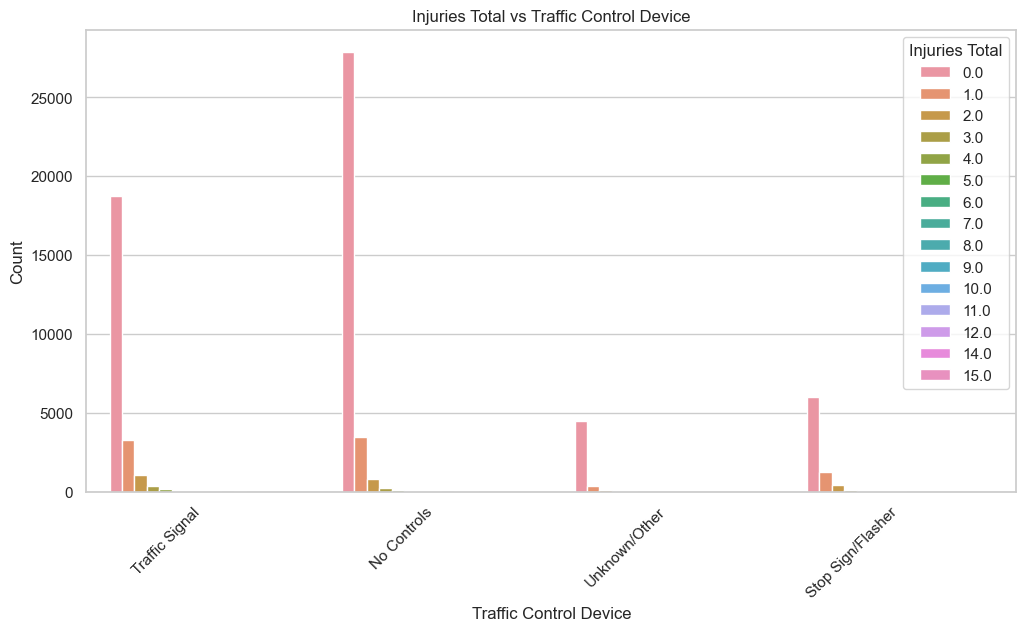

In [90]:
# Create a countplot to visualize the distribution of injuries for each traffic control device

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.countplot(x='TRAFFIC_CONTROL_DEVICE', hue='INJURIES_TOTAL', data=Chicagocrush2023)
plt.title('Injuries Total vs Traffic Control Device')
plt.xlabel('Traffic Control Device')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Injuries Total', loc='upper right')
plt.show()

In [91]:
# Defining a dictionary map for remapping weather conditions to plot against injuries
weather_condition_map = {
    'CLEAR': 'CLEAR',
    'RAIN': 'RAIN',
    'SNOW': 'SNOW',
    'CLOUDY/OVERCAST': 'CLOUDY',
    'UNKNOWN': 'CLEAR',
    'OTHER': 'CLEAR',
    'FREEZING RAIN/DRIZZLE': 'RAIN',
    'FOG/SMOKE/HAZE': 'FOG',
    'SLEET/HAIL': 'FOG',
    'BLOWING SNOW': 'FOG',
    'SEVERE CROSS WIND GATE': 'FOG',
    'BLOWING SAND, SOIL, DIRT': 'FOG'
}

# Remap values in the 'WEATHER_CONDITION' column using the defined map
Chicagocrush2023.loc[:, 'WEATHER_CONDITION'] = Chicagocrush2023['WEATHER_CONDITION'].map(weather_condition_map)

# Check the updated value counts
weather_condition_counts = Chicagocrush2023['WEATHER_CONDITION'].value_counts()
print(weather_condition_counts)

WEATHER_CONDITION
CLEAR     57350
RAIN       7444
CLOUDY     2301
SNOW       1406
FOG         266
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


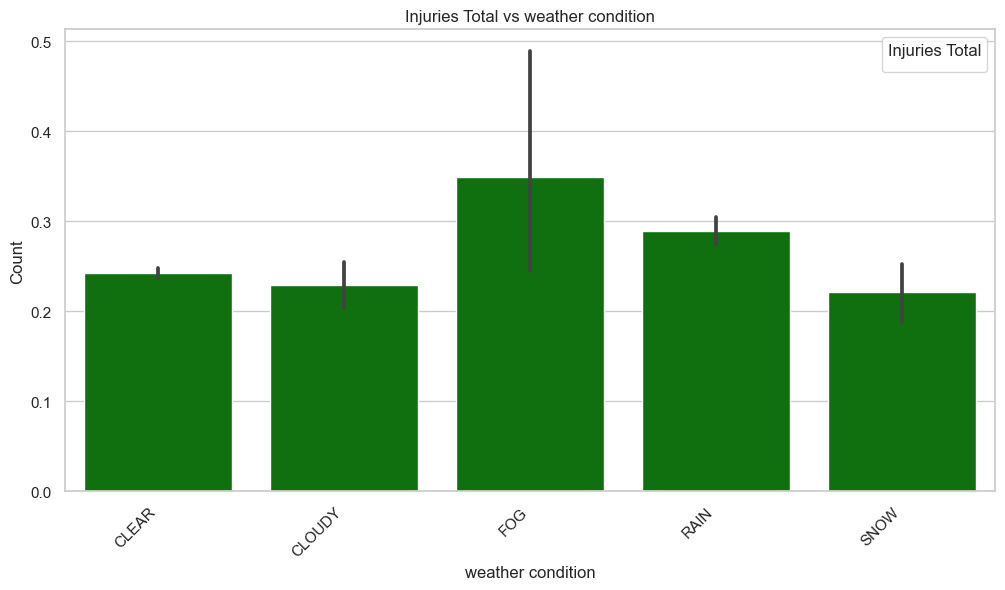

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(x='WEATHER_CONDITION', y='INJURIES_TOTAL', data=Chicagocrush2023, color='green')
plt.title('Injuries Total vs weather condition')
plt.xlabel('weather condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Injuries Total', loc='upper right')
plt.show()

In [93]:
# FEATURE ENGINEERING
# Binning age
bins = [0, 25, 50, 100]
labels = ['Young', 'Adult', 'Senior']
Chicagocrush2023.loc[:,'AGE_GROUP'] = pd.cut(Chicagocrush2023['AGE'], bins=bins, labels=labels)

C:\Users\hp\AppData\Local\Temp\ipykernel_6560\3919465822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicagocrush2023.loc[:,'AGE_GROUP'] = pd.cut(Chicagocrush2023['AGE'], bins=bins, labels=labels)


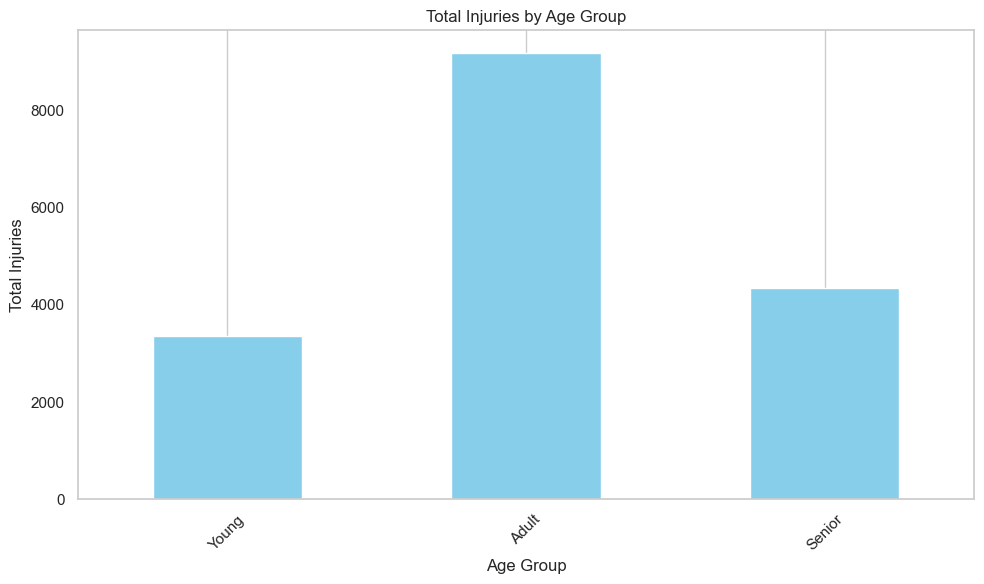

In [94]:


# Assuming you have a DataFrame named 'data' with 'AGE_GROUP' and 'TOTAL_INJURIES' columns

# Group the data by 'AGE_GROUP' and calculate the total injuries for each group
agegroup_total_injuries = Chicagocrush2023.groupby('AGE_GROUP')['INJURIES_TOTAL'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
agegroup_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6560\3928030688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicagocrush2023.loc[:,'PERIOD_OF_DAY'] = pd.cut(Chicagocrush2023['CRASH_HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])


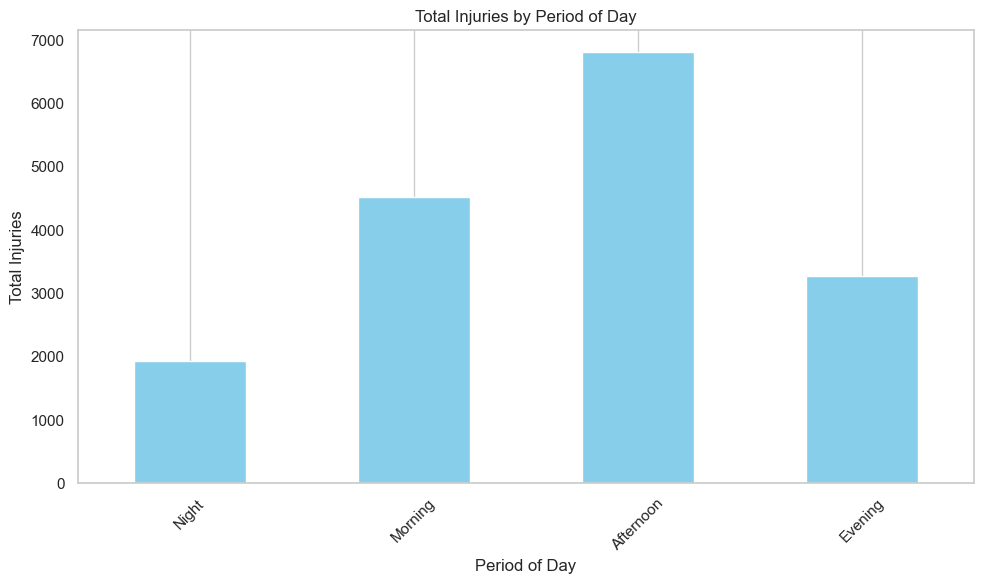

In [95]:
# Time period encoding
Chicagocrush2023.loc[:,'PERIOD_OF_DAY'] = pd.cut(Chicagocrush2023['CRASH_HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
# Group the data by 'PERIOD_OF_DAY' and calculate the total injuries for each group
period_of_day_total_injuries = Chicagocrush2023.groupby('PERIOD_OF_DAY')['INJURIES_TOTAL'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
period_of_day_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Period of Day')
plt.xlabel('Period of Day')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

<Axes: xlabel='PERIOD_OF_DAY', ylabel='count'>

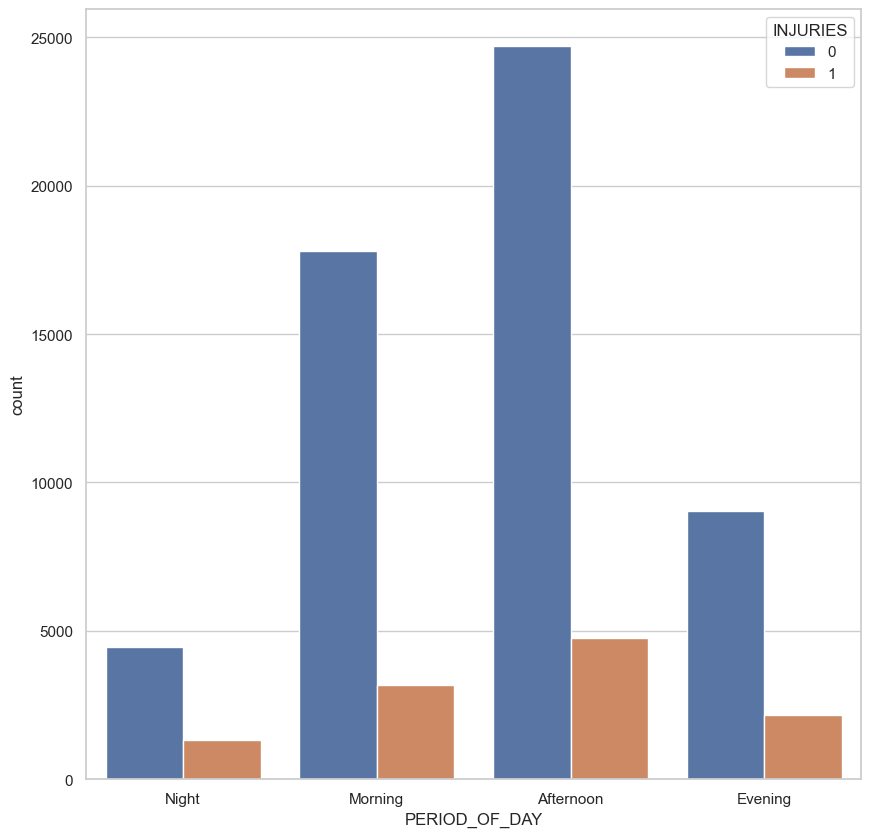

In [96]:
# representing period of day in relation to injuries 

plt.figure(figsize=(10,10))
sns.countplot(x="PERIOD_OF_DAY", hue="INJURIES", data=Chicagocrush2023)

C:\Users\hp\AppData\Local\Temp\ipykernel_6560\1816627131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicagocrush2023.loc[:,'YEAR'] = Chicagocrush2023['CRASH_DATE'].dt.year
C:\Users\hp\AppData\Local\Temp\ipykernel_6560\1816627131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicagocrush2023.loc[:,'VEHICLE_AGE'] = Chicagocrush2023['YEAR'] - Chicagocrush2023['VEHICLE_YEAR']
C:\Users\hp\AppData\Local\Temp\ipykernel_6560\1816627131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a 

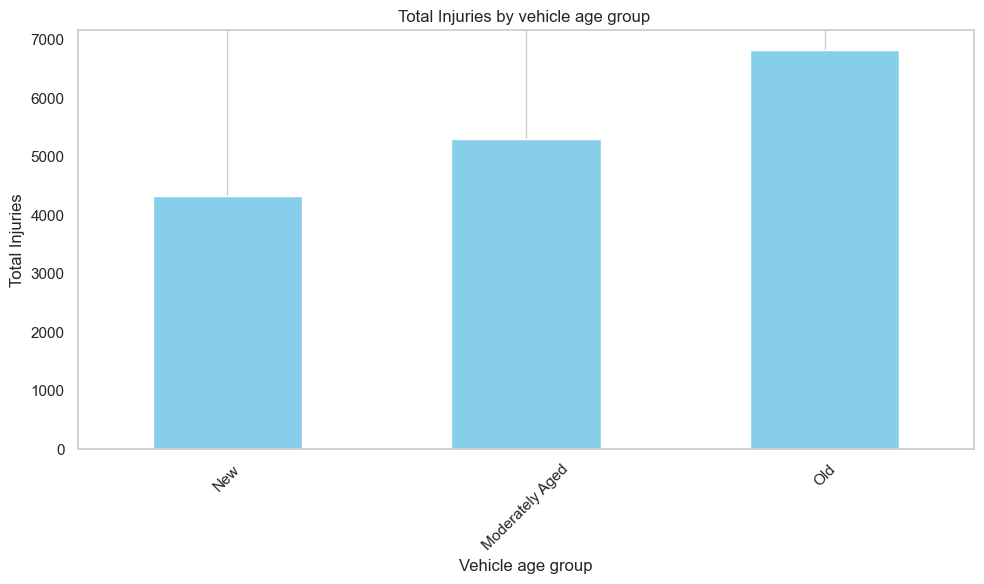

In [97]:
# Convert 'CRASH_DATE' to datetime format
Chicagocrush2023.loc[:,'CRASH_DATE'] = pd.to_datetime(Chicagocrush2023['CRASH_DATE'])

# Extract just the year
Chicagocrush2023.loc[:,'YEAR'] = Chicagocrush2023['CRASH_DATE'].dt.year
# Calculate the age of the vehicle at the time of the accident
Chicagocrush2023.loc[:,'VEHICLE_AGE'] = Chicagocrush2023['YEAR'] - Chicagocrush2023['VEHICLE_YEAR']

# Binning vehicle age
bins = [0, 5, 10, float('inf')]  # Example bins: 0-5 years, 5-10 years, >10 years
labels = ['New', 'Moderately Aged', 'Old']
Chicagocrush2023.loc[:,'VEHICLE_AGE_GROUP'] = pd.cut(Chicagocrush2023['VEHICLE_AGE'], bins=bins, labels=labels)
#  Group the data by 'VEHICLE_AGE_GROUP' and calculate the total injuries for each group
vehicle_age_group_total_injuries = Chicagocrush2023.groupby('VEHICLE_AGE_GROUP')['INJURIES_TOTAL'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
vehicle_age_group_total_injuries.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by vehicle age group ')
plt.xlabel('Vehicle age group')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [98]:
# preview the columns in the dataset
Chicagocrush2023.columns

Index(['CRASH_RECORD_ID', 'CITY', 'STATE', 'SEX', 'AGE', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION', 'UNIT_NO', 'UNIT_TYPE',
       'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'INJURIES', 'AGE_GROUP',
       'PERIOD_OF_DAY', 'YEAR', 'VEHICLE_AGE', 'VEHICLE_AGE_GROUP'],
      dtype='object')

In [99]:
# dropping columns
columns_drop = ['DEVICE_CONDITION','VEHICLE_DEFECT','MODEL']
Chicagocrush2023 = Chicagocrush2023.drop(columns=columns_drop)
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CRASH_RECORD_ID          68767 non-null  object        
 1   CITY                     68767 non-null  object        
 2   STATE                    68767 non-null  object        
 3   SEX                      68767 non-null  object        
 4   AGE                      68767 non-null  float64       
 5   AIRBAG_DEPLOYED          68767 non-null  object        
 6   EJECTION                 68767 non-null  object        
 7   INJURY_CLASSIFICATION    68767 non-null  object        
 8   DRIVER_ACTION            68767 non-null  object        
 9   DRIVER_VISION            68767 non-null  object        
 10  PHYSICAL_CONDITION       68767 non-null  object        
 11  CRASH_DATE               68767 non-null  datetime64[ns]
 12  POSTED_SPEED_LIMIT       68767 no

In [100]:
# previewing the data columns and type
Chicagocrush2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68767 entries, 324 to 1553242
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CRASH_RECORD_ID          68767 non-null  object        
 1   CITY                     68767 non-null  object        
 2   STATE                    68767 non-null  object        
 3   SEX                      68767 non-null  object        
 4   AGE                      68767 non-null  float64       
 5   AIRBAG_DEPLOYED          68767 non-null  object        
 6   EJECTION                 68767 non-null  object        
 7   INJURY_CLASSIFICATION    68767 non-null  object        
 8   DRIVER_ACTION            68767 non-null  object        
 9   DRIVER_VISION            68767 non-null  object        
 10  PHYSICAL_CONDITION       68767 non-null  object        
 11  CRASH_DATE               68767 non-null  datetime64[ns]
 12  POSTED_SPEED_LIMIT       68767 no

In [101]:
# dropping irrelevant columns
columns_drop = ['STATE','EJECTION','INJURY_CLASSIFICATION','CRASH_TYPE','DAMAGE','PRIM_CONTRIBUTORY_CAUSE',
                'SEC_CONTRIBUTORY_CAUSE','STREET_NAME', 'MOST_SEVERE_INJURY','CRASH_DAY_OF_WEEK','CRASH_MONTH',
                'UNIT_NO','UNIT_TYPE','VEHICLE_ID','MAKE','MANEUVER','INJURIES_TOTAL', 'AGE','CRASH_HOUR',
                'CRASH_DATE','CRASH_RECORD_ID','VEHICLE_TYPE','VEHICLE_YEAR','YEAR']
                
Chicagocrush2023 = Chicagocrush2023.drop(columns=columns_drop)


In [102]:
# data preview
Chicagocrush2023.head()

,CITY,SEX,AIRBAG_DEPLOYED,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,ROAD_DEFECT,LOCATION,VEHICLE_USE,INJURIES,AGE_GROUP,PERIOD_OF_DAY,VEHICLE_AGE,VEHICLE_AGE_GROUP
324,222,1,5,18,12,8,25.0,Traffic Signal,CLEAR,3,1,POINT (-87.62074372624 41.894903302355),13,0,Adult,Morning,3.0,New
1389,384,1,5,13,12,8,25.0,No Controls,CLEAR,3,5,POINT (-87.666660920894 41.883412272558),13,0,Young,Afternoon,15.0,Old
27431,384,0,3,7,12,8,25.0,No Controls,CLOUDY,1,1,POINT (-87.619928173678 41.900958919109),13,0,Adult,NaN,9.0,Moderately Aged
31253,1140,1,5,12,7,8,30.0,Traffic Signal,CLEAR,1,1,POINT (-87.649845247672 41.954510607628),13,0,Young,Evening,19.0,Old
40908,384,0,5,18,7,8,30.0,No Controls,CLEAR,1,1,POINT (-87.615982223764 41.788862750489),13,0,Adult,Night,7.0,Moderately Aged


### Train test split

In [103]:


# Define features (X) and target variable (y)
X = Chicagocrush2023.drop(columns=['INJURIES'])  # Features
y = Chicagocrush2023['INJURIES']  # Target variable

# Split the data into training and temporary set (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and testing sets (50% validation, 50% testing)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (48136, 17) (48136,)
Validation set: (10315, 17) (10315,)
Testing set: (10316, 17) (10316,)


In [104]:
num_columns = Chicagocrush2023.drop(columns='INJURIES').select_dtypes('number').columns.tolist()
num_columns

['POSTED_SPEED_LIMIT', 'VEHICLE_AGE']

In [105]:
cat_cols = Chicagocrush2023.drop(columns='INJURIES').select_dtypes('object').columns.tolist()
cat_cols

['CITY',
 'SEX',
 'AIRBAG_DEPLOYED',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION',
 'TRAFFIC_CONTROL_DEVICE',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'ROAD_DEFECT',
 'LOCATION',
 'VEHICLE_USE']

In [106]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# combine both pipelines into one using columntransformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_columns),
        ('cat', categorical_transformer, cat_cols)
    ])



# preprocessing X_train and X_test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
# Fit and transform the data
# X_transformed = preprocessor.fit_transform(Chicagocrush2023)


In [107]:
X_test_transformed

<10316x36832 sparse matrix of type '<class 'numpy.float64'>'
	with 138145 stored elements in Compressed Sparse Row format>

In [108]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessor.named_transformers_['cat']
cat_features = slice_pipe.named_steps['onehot'].get_feature_names_out(cat_cols)
X_train_transformed = pd.DataFrame(X_train_transformed,columns=[*num_columns, *cat_features])
X_train_transformed

ValueError: Shape of passed values is (48136, 1), indices imply (48136, 36832)

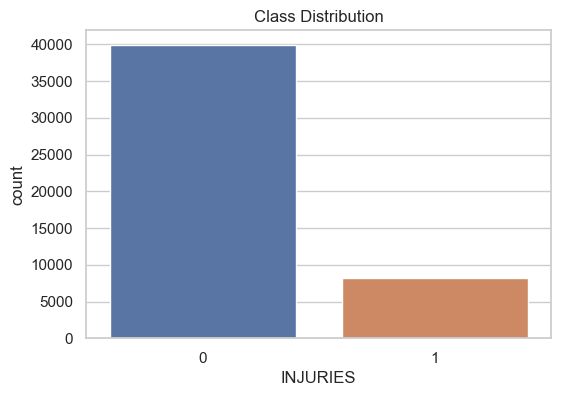

In [109]:

# Checking for imbalance visually
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.show()

In [110]:
# checking for imbalance
class_distribution = y_train.value_counts(normalize=True)
print(class_distribution)

INJURIES
0    0.829525
1    0.170475
Name: proportion, dtype: float64


In [111]:
# observation there is high imbalance and to solve we will use resampling(SMOTE)
 
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


### LOGISTIC REGRESSION MODEL

In [113]:
# instantiate LogisticRegression 
log_reg = LogisticRegression()

In [114]:
# Fit the model
log_reg.fit(X_train, y_train)
# predict
# y_pred = log_reg.predict(X_test)

ValueError: could not convert string to float: 'Stop Sign/Flasher'

### KNN MODEL

In [115]:
knn_clf = KNeighborsClassifier()

In [116]:
# fit the model 
knn_clf.fit(X_train_transformed, y_train)

# predict
y_pred = knn_clf.predict(X_test_transformed)

In [117]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8267739433889104
Precision: 0.785723295045503
Recall: 0.8267739433889104
F1 Score: 0.7932818006167912
Confusion Matrix:
 [[8228  362]
 [1425  301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      8590
           1       0.45      0.17      0.25      1726

    accuracy                           0.83     10316
   macro avg       0.65      0.57      0.58     10316
weighted avg       0.79      0.83      0.79     10316



### Decision trees

In [119]:

# instantiate DecisionTreeClassifier 
tree_clf = DecisionTreeClassifier()

In [120]:
# fit the model  
tree_clf.fit(X_train_transformed, y_train)

# predict 
y_pred = tree_clf.predict(X_test_transformed)

In [121]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8273555641721597
Precision: 0.7934964650207369
Recall: 0.8273555641721597
F1 Score: 0.8015792790024536
Confusion Matrix:
 [[8145  445]
 [1336  390]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      8590
           1       0.47      0.23      0.30      1726

    accuracy                           0.83     10316
   macro avg       0.66      0.59      0.60     10316
weighted avg       0.79      0.83      0.80     10316



### Intrepretation


KNN and Decision trees returned an accuracy rate of 83%


### Conclusion

* Most of the injuries recorded were caused by drivers between the age of 25 to 50 years falling into the adult category
* Based on the data, it shows that most accidents occur in the afternoon/rush hour.
* It also shows that most accidents occur in speed limit zones labeled between 30-40 mph.
* Most of the vehicles involved in the accidents fell into the old category that is they were in the road for a period of more than ten years
* Most of the accidents occured where there were no traffic signals but less injuries were observed


### Recommendations

The following are our recommendations ;
* The city to put restrictions on vehicles allowed in roads to be below ten years
* The city lowers the speed limit during afternoon/rush hour or more patrol in the 30-40 mph zones.
* The city should increase the traffic control devices to reduce in accidents occurences